In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#Analysing the job market based on COVID 19 impact on Apprenticeship and levy statistics from the website 'https://www.gov.uk/government/statistics/apprenticeships-and-traineeships-june-2020'
data = r"https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/894263/june-2020-release_monthly-table-pack.xlsx"
df=pd.read_excel(data, sheet_name='Table_1', skiprows=range(0,3), skipfooter=11, index_col=0)
df=df.replace("-",0)
# - instead of 0 leads the graph to have dtypes as objects/ strings which will not allow us to analyse the information effectively.

In [26]:
# changing the column headers to FA for Fully Agreed and PA for Pending Approval, note U19 means under 19 years of age.
df.columns = ['FA_U19', 'FA_19to24', 'FA_25+', 'FA_AgeUnknown', 'FA_AllAges', 'PA_U19', 'PA_19to24', 'PA_25+', 'PA_AgeUnknown', 'PA_AllAges','Total_U19','Total_19to24','Total_25+','Total_AgeUnknown', 'Total_AllAges']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2017-05-01 to 2020-11-01
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   FA_U19            43 non-null     int64
 1   FA_19to24         43 non-null     int64
 2   FA_25+            43 non-null     int64
 3   FA_AgeUnknown     43 non-null     int64
 4   FA_AllAges        43 non-null     int64
 5   PA_U19            43 non-null     int64
 6   PA_19to24         43 non-null     int64
 7   PA_25+            43 non-null     int64
 8   PA_AgeUnknown     43 non-null     int64
 9   PA_AllAges        43 non-null     int64
 10  Total_U19         43 non-null     int64
 11  Total_19to24      43 non-null     int64
 12  Total_25+         43 non-null     int64
 13  Total_AgeUnknown  43 non-null     int64
 14  Total_AllAges     43 non-null     int64
dtypes: int64(15)
memory usage: 5.4 KB


In [30]:
df.describe()

,FA_U19,FA_19to24,FA_25+,FA_AgeUnknown,FA_AllAges,PA_U19,PA_19to24,PA_25+,PA_AgeUnknown,PA_AllAges,Total_U19,Total_19to24,Total_25+,Total_AgeUnknown,Total_AllAges
count,43.000000,43.000000,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,2090.000000,3589.534884,5906.279070,0.0,11584.883721,41.627907,72.558140,119.767442,8.372093,241.627907,2131.627907,3662.325581,6025.813953,8.372093,11818.604651
std,2461.689315,2795.566178,3768.781553,0.0,8521.994058,47.755839,81.037705,145.331941,11.737249,264.331414,2498.099211,2834.493183,3821.510691,11.737249,8646.916759
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,930.000000,1940.000000,3510.000000,0.0,6400.000000,10.000000,20.000000,30.000000,0.000000,75.000000,940.000000,2070.000000,3775.000000,0.000000,6800.000000
50%,1370.000000,3350.000000,5770.000000,0.0,11530.000000,20.000000,40.000000,70.000000,10.000000,160.000000,1390.000000,3390.000000,5820.000000,10.000000,11700.000000
75%,2350.000000,4330.000000,8210.000000,0.0,14475.000000,50.000000,85.000000,115.000000,10.000000,280.000000,2380.000000,4415.000000,8275.000000,10.000000,14800.000000
max,11260.000000,14020.000000,17380.000000,0.0,42650.000000,250.000000,310.000000,650.000000,60.000000,1160.000000,11510.000000,14320.000000,17710.000000,60.000000,43600.000000


In [31]:
df.loc[df.FA_U19.idxmax()]

FA_U19              11260
FA_19to24           14020
FA_25+              17380
FA_AgeUnknown           0
FA_AllAges          42650
PA_U19                250
PA_19to24             310
PA_25+                340
PA_AgeUnknown          40
PA_AllAges            930
Total_U19           11510
Total_19to24        14320
Total_25+           17710
Total_AgeUnknown       40
Total_AllAges       43600
Name: 2019-09-01 00:00:00, dtype: int64

In [32]:
#In September 2019 the number of Fully Agreed Under 19 Apprenticeship was as its peak value of 11,260 apprentices.

In [33]:
df.loc[df.FA_U19.idxmin()]
#In August 2020 the number of Fully Agreed Under 19 Apprenticeship was as its lowest value of 0 apprentices.

FA_U19               0
FA_19to24            0
FA_25+               0
FA_AgeUnknown        0
FA_AllAges           0
PA_U19               0
PA_19to24            0
PA_25+              20
PA_AgeUnknown        0
PA_AllAges          20
Total_U19            0
Total_19to24         0
Total_25+           20
Total_AgeUnknown     0
Total_AllAges        0
Name: 2020-08-01 00:00:00, dtype: int64

<AxesSubplot:xlabel='Age'>

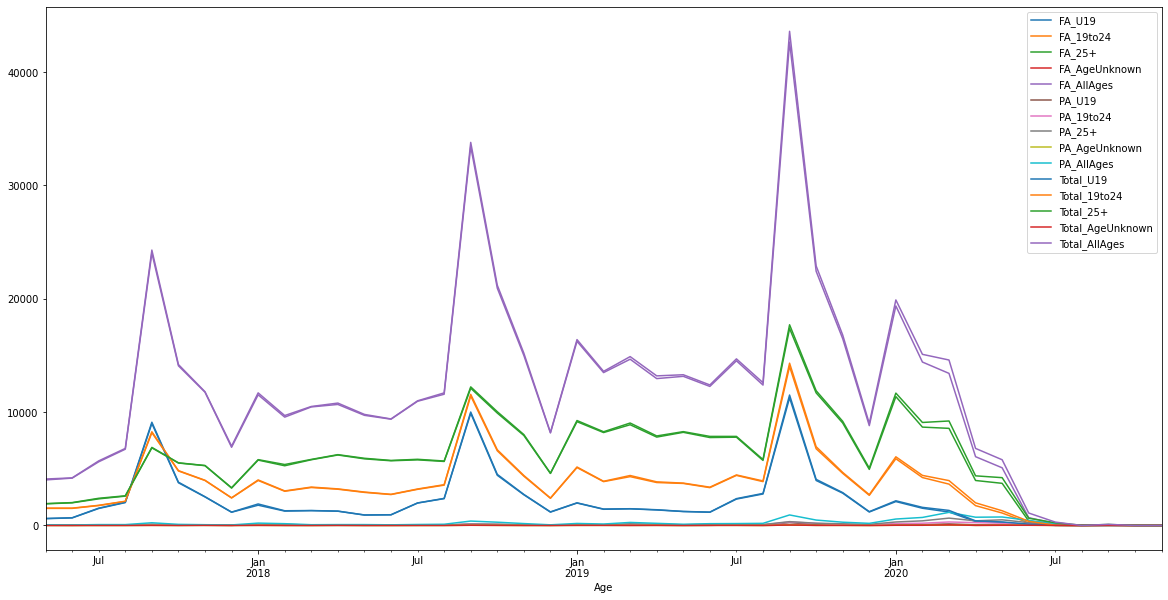

In [34]:
df.plot(figsize=(20,10))
#plot the information on a graph to see the trends.

In [ ]:
#The graph shows a sharp drop in number of apprentices from April 2020 in the UK showing that the number of apprentices have been majorly effected due to COVID 19. 